<a href="https://colab.research.google.com/github/SumitNikhade/Machine-learning/blob/main/KMeans_Clustering_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as no
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [8]:
data= pd.read_csv('Iris.csv')
data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
data.shape

(150, 6)

In [10]:
data.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [11]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [12]:
data.keys()

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [13]:
for i,col in enumerate(data.columns):
  print(f'Columns number{i+1} is {col}')

Columns number1 is Id
Columns number2 is SepalLengthCm
Columns number3 is SepalWidthCm
Columns number4 is PetalLengthCm
Columns number5 is PetalWidthCm
Columns number6 is Species


In [14]:
data.dtypes


,0
Id,int64
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64
Species,object


In [15]:
data.drop('Id',axis=1,inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
data.isnull().sum()


,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [17]:
target_data= data.iloc[:,4]
target_data.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [18]:
clustering_data=data.iloc[:,[0,1,2,3]]
clustering_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


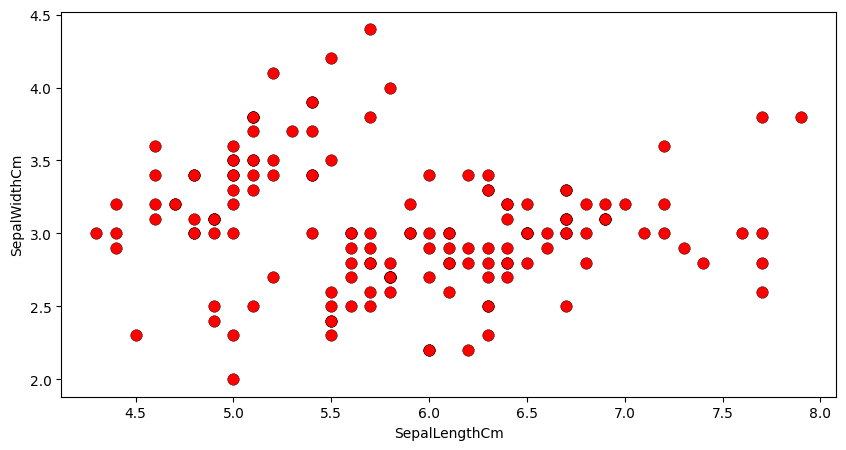

In [19]:
fig, ax =plt.subplots(figsize=(10,5))
sns.set(font_scale=1.5)
ax=sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=data, s=70, color='Red', edgecolor='black', linewidth=0.3)
ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('SepalWidthCm')
plt.show()

In [20]:
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i, init='k-means++', random_state=42)
  km.fit(clustering_data)
  wcss.append(km.inertia_)

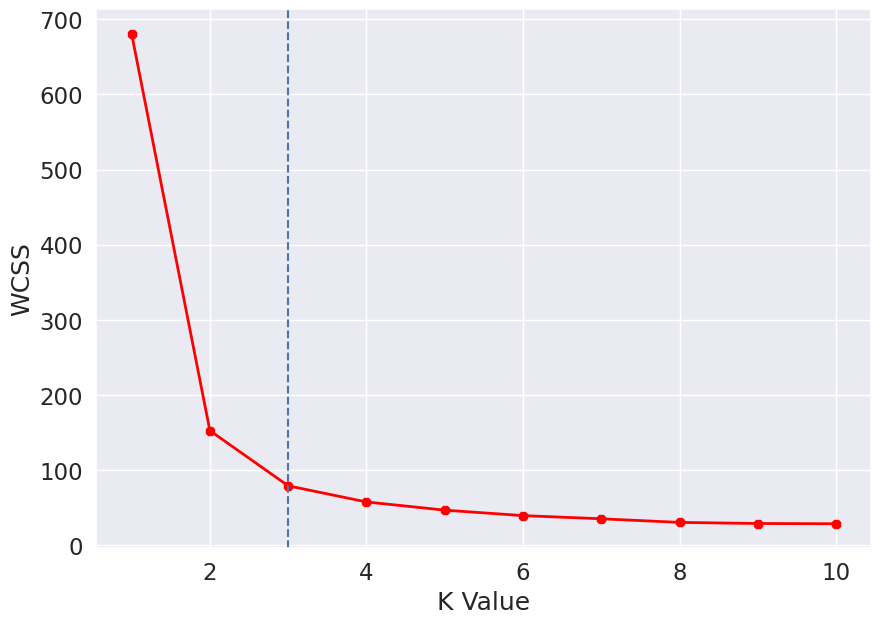

In [21]:

fig, ax = plt.subplots(figsize=(10,7))
plt.plot(range(1,11), wcss, linewidth=2, color='red', marker='8')
plt.axvline(x=3, linestyle='--')
plt.xlabel('K Value')
plt.ylabel('WCSS')
plt.show()

In [23]:
kms = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = clustering_data.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(clustering_data)


print(clusters.head())

centroids = kms.cluster_centers_
print(centroids)


   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0            5.1           3.5            1.4           0.2   
1            4.9           3.0            1.4           0.2   
2            4.7           3.2            1.3           0.2   
3            4.6           3.1            1.5           0.2   
4            5.0           3.6            1.4           0.2   

   Cluster_Prediction  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1  
[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.418      1.464      0.244     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


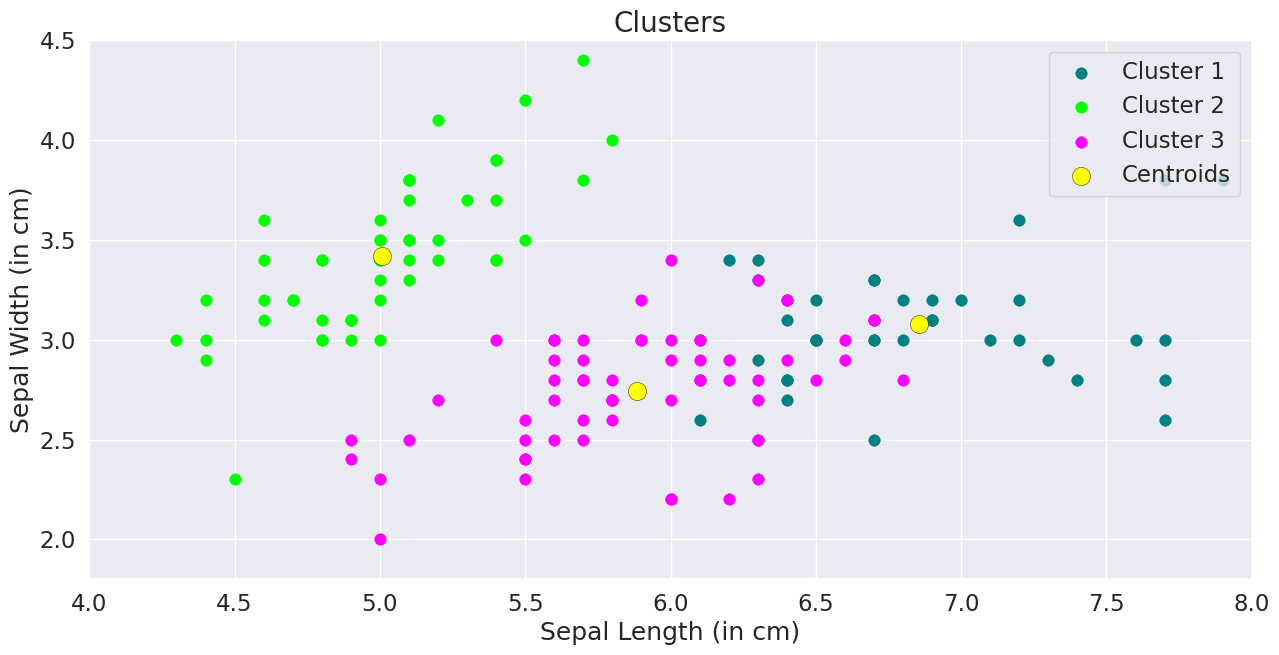

In [24]:
fig, ax = plt.subplots(figsize=(15, 7))
plt.scatter(clusters[clusters['Cluster_Prediction'] == 0]['SepalLengthCm'],
            clusters[clusters['Cluster_Prediction'] == 0]['SepalWidthCm'],
            s=70, edgecolor='teal', linewidth=0.3, c='teal', label='Cluster 1')
plt.scatter(clusters[clusters['Cluster_Prediction'] == 1]['SepalLengthCm'],
            clusters[clusters['Cluster_Prediction'] == 1]['SepalWidthCm'],
            s=70, edgecolor='lime', linewidth=0.3, c='lime', label='Cluster 2')
plt.scatter(clusters[clusters['Cluster_Prediction'] == 2]['SepalLengthCm'],
            clusters[clusters['Cluster_Prediction'] == 2]['SepalWidthCm'],
            s=70, edgecolor='magenta', linewidth=0.3, c='magenta', label='Cluster 3')


plt.scatter(centroids[:, 0], centroids[:, 1], s=170, c='yellow', label='Centroids', edgecolor='black', linewidth=0.3)
plt.legend(loc='upper right')
plt.xlim(4, 8)
plt.ylim(1.8, 4.5)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Clusters', fontsize=20)
plt.show()